# Seasonal Decompose


## Omajinai

In [1]:
import pandas as pd

import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = (12, 6)

import plotly.express as px
import plotly.io as pio
pio.renderers.default = "jupyterlab+svg"

In [2]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

## Data

In [3]:
!wget https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv -O newly_confirmed_cases_daily.csv

--2022-04-21 23:44:24--  https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv
Resolving covid19.mhlw.go.jp (covid19.mhlw.go.jp)... 13.224.141.106, 13.224.141.128, 13.224.141.109, ...
Connecting to covid19.mhlw.go.jp (covid19.mhlw.go.jp)|13.224.141.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 117757 (115K) [application/octet-stream]
Saving to: ‘newly_confirmed_cases_daily.csv’

newly_confirmed_cas 100%[===================>] 115.00K  --.-KB/s    in 0.06s   

2022-04-21 23:44:24 (1.76 MB/s) - ‘newly_confirmed_cases_daily.csv’ saved [117757/117757]



In [4]:
df = pd.read_csv('newly_confirmed_cases_daily.csv', index_col=0)
df.index = pd.to_datetime(df.index)
print(df.shape)
df

(826, 48)


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-16,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-16,47543,2457,418,357,567,296,192,556,1034,552,...,275,147,2383,534,394,646,320,654,713,1439
2022-04-17,39214,2113,294,340,415,247,185,446,971,420,...,197,129,1996,248,346,475,274,548,662,1315
2022-04-18,24164,1766,153,188,219,182,130,316,845,356,...,125,77,1406,373,202,328,193,295,340,575


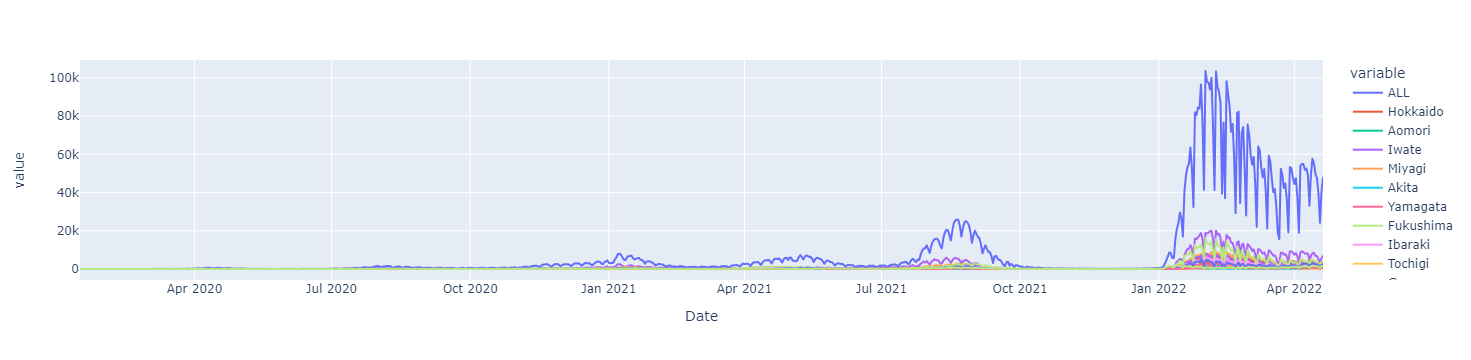

In [5]:
px.line(df, )

In [6]:
df_gr = df.groupby(pd.Grouper(level='Date', freq='W')).sum()
print(df_gr.shape)
display(df_gr.head(1))
display(df_gr.tail(1))

(119, 48)


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-19,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-24,112847,6891,957,810,1536,834,620,1475,1955,1835,...,826,402,5919,1623,1333,1784,938,1346,1918,3703


### weekly

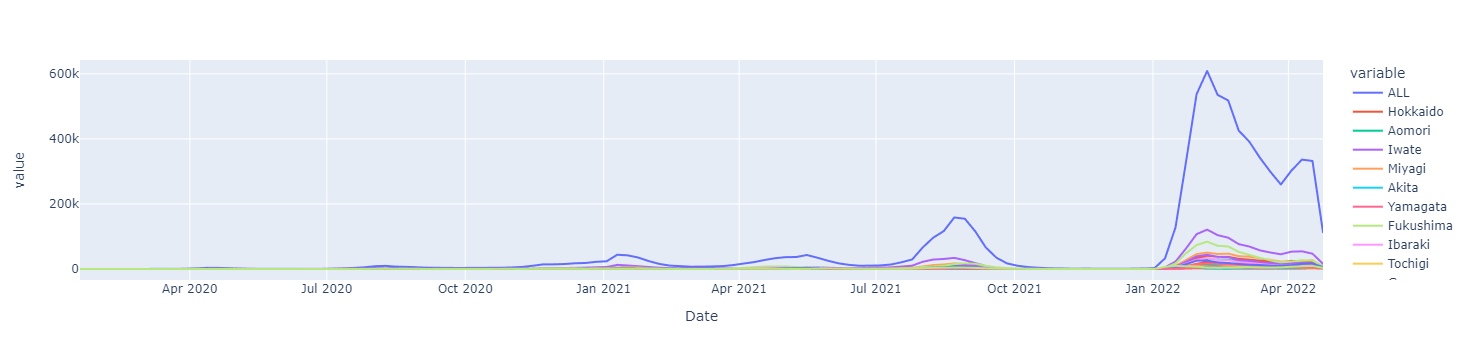

In [7]:
px.line(df_gr,)

## Decompose

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

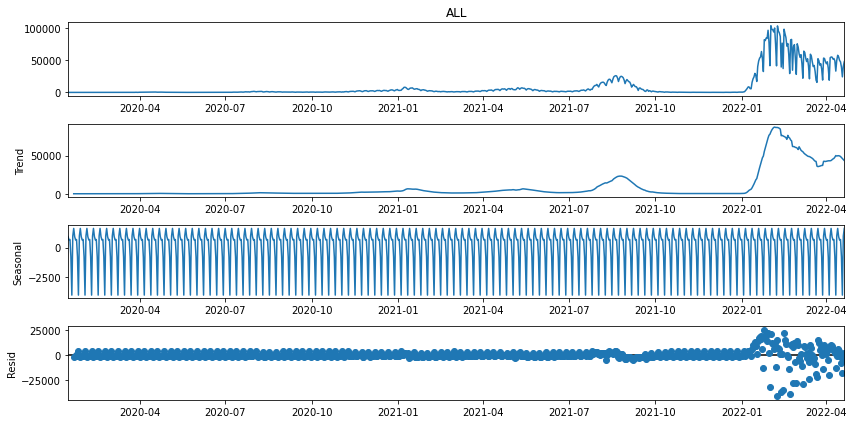

In [9]:
sd = seasonal_decompose(df.ALL, two_sided=False, )#period=7)
fig = sd.plot()

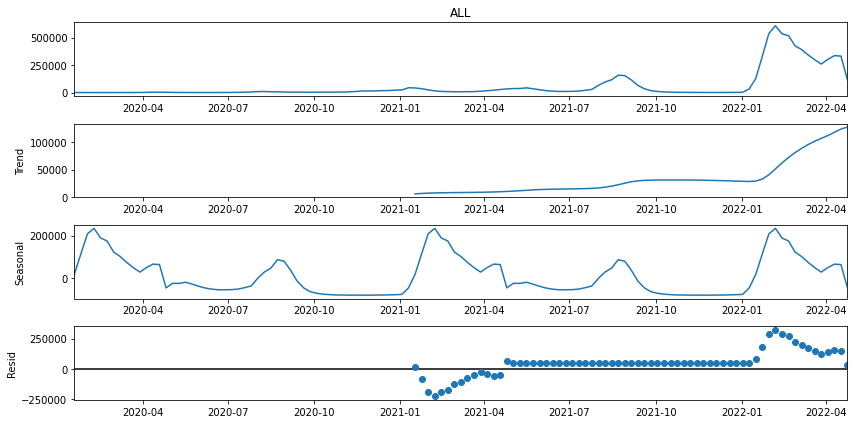

In [10]:
sd = seasonal_decompose(df_gr.ALL, two_sided=False, )#period=12)
fig = sd.plot()